<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# Single-layer Perceptron

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Previsões
predictions = perceptron.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Visualizando exemplos verdadeiros e valores previstos
num_examples = 5
random_indices = np.random.choice(len(X_test), num_examples)

for index in random_indices:
    true_label = y_test[index]
    predicted_label = predictions[index]

    print(f"Exemplo {index + 1}: Verdadeiro - {true_label}, Previsto - {predicted_label}")

Accuracy: 0.8
Exemplo 5: Verdadeiro - 1, Previsto - 1
Exemplo 17: Verdadeiro - 2, Previsto - 2
Exemplo 20: Verdadeiro - 2, Previsto - 2
Exemplo 7: Verdadeiro - 1, Previsto - 0
Exemplo 22: Verdadeiro - 2, Previsto - 2


# Multilayer Perceptron (MLP)

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinamento do MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [8]:
# Previsão
predictions_mlp = mlp.predict(X_test)

# Acurácia
accuracy_mlp = accuracy_score(y_test, predictions_mlp)
print(f'Accuracy (MLP): {accuracy_mlp}')

Accuracy (MLP): 1.0


In [9]:
# Visualizando exemplos verdadeiros e valores previstos
num_examples = 5
random_indices = np.random.choice(len(X_test), num_examples)

for index in random_indices:
    true_label = y_test[index]
    predicted_label = predictions_mlp[index]

    print(f"Exemplo {index + 1}: Verdadeiro - {true_label}, Previsto - {predicted_label}")

Exemplo 18: Verdadeiro - 1, Previsto - 1
Exemplo 9: Verdadeiro - 1, Previsto - 1
Exemplo 6: Verdadeiro - 0, Previsto - 0
Exemplo 23: Verdadeiro - 0, Previsto - 0
Exemplo 30: Verdadeiro - 0, Previsto - 0


In [10]:
X_train[0, :]

array([-1.50652052,  1.24920112, -1.56757623, -1.3154443 ])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Carregando o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizando os valores dos pixels para o intervalo [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionando as imagens para uma dimensão
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Convertendo os rótulos para codificação one-hot
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Criando o modelo MLP
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\fonsecovizk\Projetos\enem-microdados-ml\.env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Treinando o modelo
model.fit(X_train_flat, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8697 - loss: 0.4759 - val_accuracy: 0.9571 - val_loss: 0.1571
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9623 - loss: 0.1336 - val_accuracy: 0.9662 - val_loss: 0.1146
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9742 - loss: 0.0893 - val_accuracy: 0.9717 - val_loss: 0.0960
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9817 - loss: 0.0645 - val_accuracy: 0.9718 - val_loss: 0.0965
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9849 - loss: 0.0506 - val_accuracy: 0.9712 - val_loss: 0.0991


In [13]:
# Avaliando o modelo no conjunto de teste
accuracy = model.evaluate(X_test_flat, y_test_cat)[1]
print(f'Acurácia do modelo no conjunto de teste: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.9649 - loss: 0.1157
Acurácia do modelo no conjunto de teste: 0.97079998254776


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step


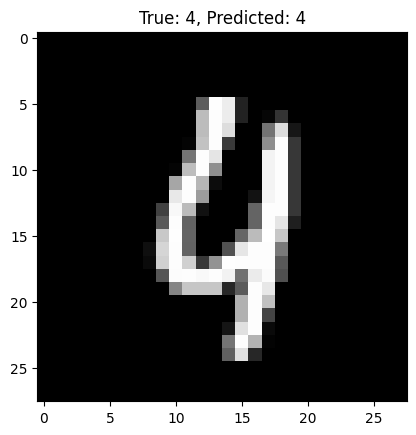

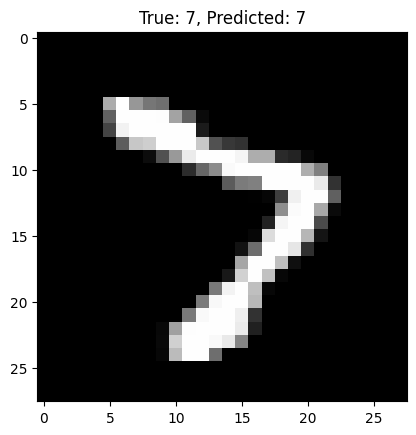

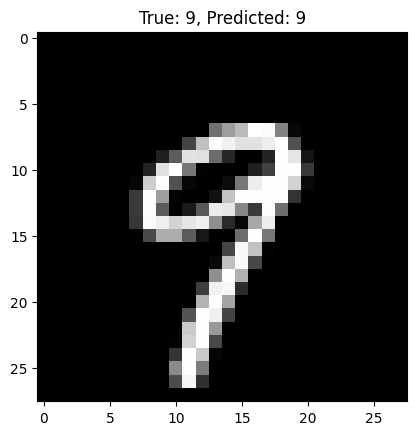

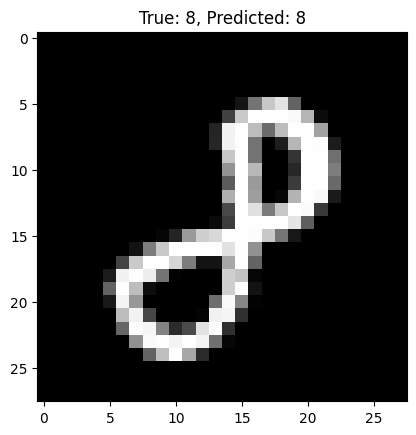

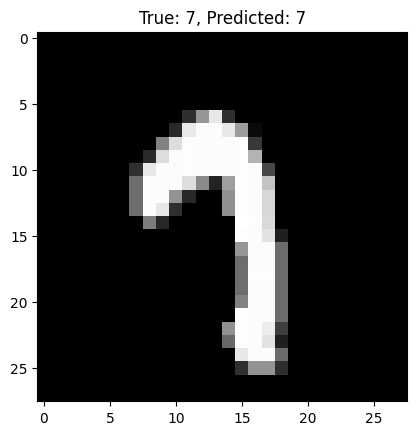

In [14]:
# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test_flat)

# Exibindo exemplos de imagens verdadeiras e números previstos
num_examples = 5
random_indices = np.random.choice(len(X_test), num_examples)

for index in random_indices:
    true_label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    plt.figure()
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.show()

<img src='https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/neural-networks/pixel-values.png' width="700px">

<img src='https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/neural-networks/output-layer.png' width="700px">